#### Project Title: Loan Eligibility Prediction  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('loan-train.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

In [4]:
loan.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#for statistical information on the data
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Check for missing values 

In [7]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan.Gender = loan.Gender.replace({'Male':1, 'Female':0})
loan.Married = loan.Married.replace({'Yes':1, 'No':0})
loan.Self_Employed = loan.Self_Employed.replace({'Yes':1, 'No':0})
loan.Loan_Status = loan.Loan_Status.replace({'Y':1, 'N':0})
loan.Education = loan.Education.replace({'Graduate':1, 'Not Graduate':0})

###### Filling null values 

In [9]:
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0])
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

##### Dropping unwanted columns 

In [10]:
loan = loan.drop(['Loan_ID'], axis=1)
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,1.0,1.0,3+,1,0.0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,Urban,1


##### Replacing numerical vaues with categorical values


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
LE = LabelEncoder()

In [13]:
col = ['Dependents', 'Property_Area']
for c in col:
    loan[c] = LE.fit_transform(loan[c])

In [14]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,1.0,1.0,3,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


##### Data Visualisation 

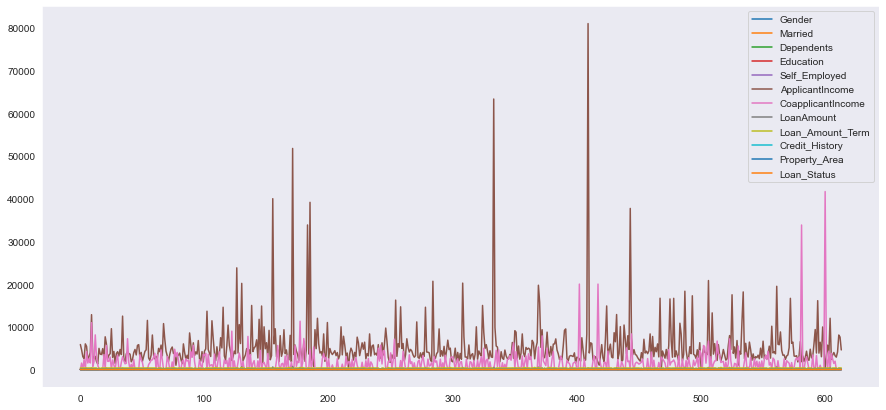

In [15]:
sns.set_style('dark')
loan.plot(figsize=(15, 7))
plt.show()

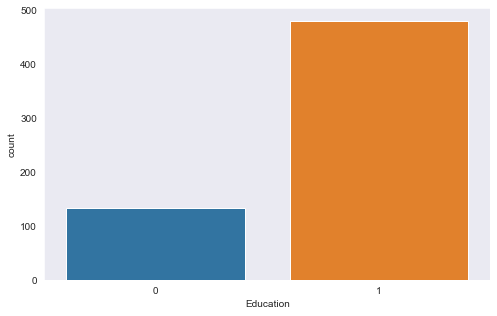

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(loan['Education'])
plt.show()

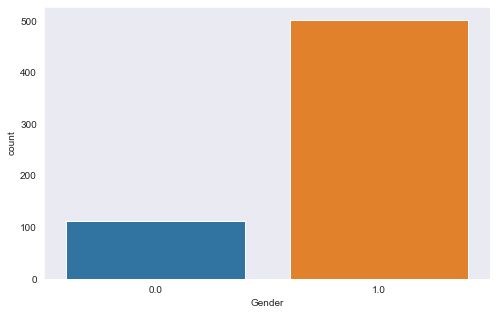

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(loan['Gender'])
plt.show()

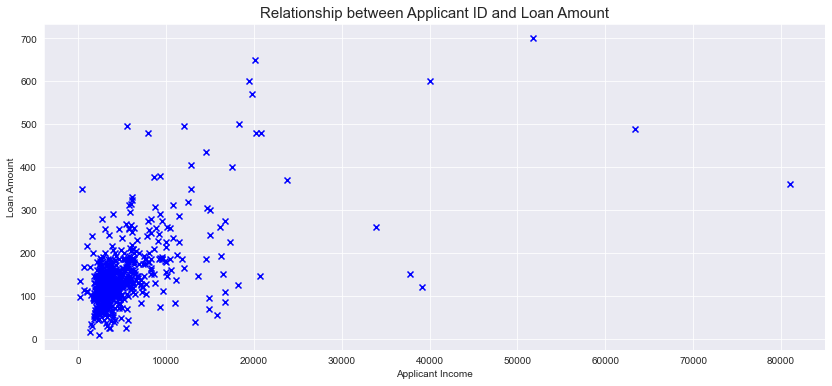

In [18]:
plt.figure(figsize=(14, 6))
plt.title('Relationship between Applicant ID and Loan Amount', fontsize=15)
plt.scatter(loan['ApplicantIncome'], loan['LoanAmount'], color = 'blue', marker = 'x')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid()
plt.show()

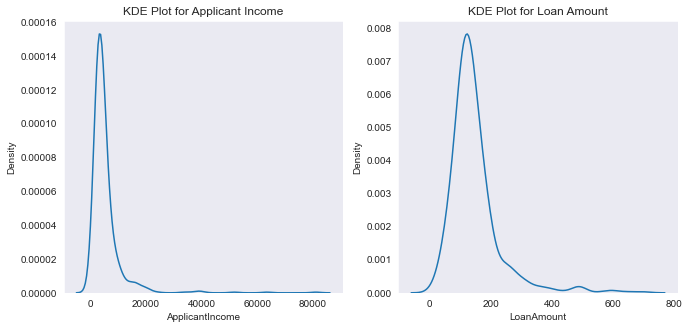

In [19]:
#checking the Kernel Density Estimator graphs for Applicant Income and Loan Amount
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(11, 5))
sns.kdeplot(loan['ApplicantIncome'], ax = ax1)
ax1.set_title('KDE Plot for Applicant Income', fontsize=12)
              
sns.kdeplot(loan['LoanAmount'], ax = ax2)
ax2.set_title('KDE Plot for Loan Amount', fontsize=12)
              
plt.show()

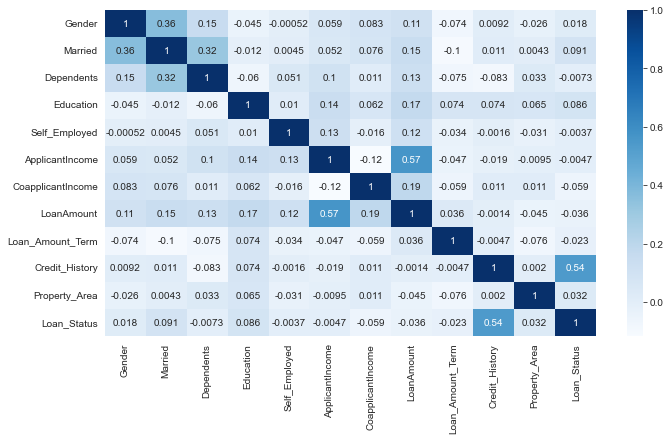

In [20]:
plt.figure(figsize=(11, 6))
correlation = loan.corr()
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.show()

In [21]:
X = loan.drop(['Loan_Status'], axis = 1)
Y = loan['Loan_Status']

#### Model Training 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10, stratify = Y)

In [23]:
len(X_train)

491

In [24]:
len(X_test)

123

#### Feature Scaling with Standard Scaler 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:
#fit the scaler to the train set to learn the parameters
ss.fit(X_train)

StandardScaler()

In [28]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [29]:
pd.DataFrame(X_train, columns = X.columns)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.483393,0.734292,-0.737711,0.508895,-0.383662,0.766327,-0.531029,-0.880834,-2.451130,0.414533,1.230520
1,0.483393,0.734292,1.925642,0.508895,-0.383662,8.748420,-0.531029,6.869335,-0.628190,0.414533,1.230520
2,0.483393,-1.361856,-0.737711,-1.965041,-0.383662,-0.355567,-0.531029,-0.818832,-4.638658,0.414533,-0.041449
3,0.483393,0.734292,2.813426,-1.965041,2.606463,-0.096581,-0.531029,-0.099617,0.283280,0.414533,1.230520
4,0.483393,0.734292,1.037858,0.508895,-0.383662,-0.602515,-0.018356,-0.558427,0.283280,0.414533,-1.313419
...,...,...,...,...,...,...,...,...,...,...,...
486,0.483393,0.734292,1.037858,-1.965041,-0.383662,-0.295946,-0.454398,-0.471625,0.283280,0.414533,-0.041449
487,0.483393,0.734292,0.150073,-1.965041,-0.383662,-0.225416,1.147905,-0.099617,0.283280,0.414533,-1.313419
488,0.483393,0.734292,1.925642,-1.965041,-0.383662,-0.390361,-0.531029,-0.893234,0.283280,0.414533,-0.041449
489,-2.068712,-1.361856,-0.737711,0.508895,-0.383662,0.893657,-0.003473,0.979207,0.283280,0.414533,-1.313419


### Using Logistic Regression Model 

Training Logistic Regression Model on the training set

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train, Y_train)

LogisticRegression()

##### Prediting the test result 

In [33]:
Ypred = lr.predict(X_test)

#### Comparing Actual and Predicted Values

In [34]:
loan_compare = pd.DataFrame({'Actual':Y_test, 'Predicted': Ypred})
loan_compare

,Actual,Predicted
507,0,1
493,1,1
434,1,1
125,1,1
294,1,1
...,...,...
82,0,1
295,1,1
369,0,1
450,0,0


##### Making the Confusion Matrix 

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
cm = confusion_matrix(Y_test, Ypred)
print(cm)

[[16 22]
 [ 1 84]]


###### Print Classification Report 

In [37]:
cr = classification_report(Y_test, Ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



Logistic Regreesion model shows an accuracy of 81 percent